In [209]:
import os
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.stats.multitest as smsm


In [210]:
def convertNtoC(U, UH, UL):
    x = (U - (UH+UL)/2) / ((UH-UL)/2)  
    return x

def convertCtoN(x, UH, UL):
    U = x*(UH-UL)/2 + (UH+UL)/2
    return U

In [211]:
convertCtoN(0.75,50,30)

47.5

In [305]:
# data = pd.read_csv("RESULTS_NSTEVENS_2023-01-19.csv
data = pd.read_csv("1_RESULTS_TMSJGGAS_2023-01-20.csv")
data['PQ'] = 0
data.columns = ["TS","MS","PL","PT","Y",'PQ']

centroid = pd.read_csv("2_RESULTS_TMSJGGAS_2023-01-20.csv")
centroid['PQ'] = 1
centroid.columns = ["TS","MS","PL","PT","Y",'PQ']

new_point_1 = pd.read_csv("3_RESULTS_TMSJGGAS_2023-01-20.csv")
new_point_1["PQ"] = 0
new_point_1.columns = ["TS","MS","PL","PT","Y",'PQ']

new_point_2 = pd.read_csv("4_RESULTS_TMSJGGAS_2023-01-20.csv")
new_point_2["PQ"] = 0
new_point_2.columns = ["TS","MS","PL","PT","Y",'PQ']

new_point_34 = pd.read_csv("5_RESULTS_TMSJGGAS_2023-01-20.csv")
new_point_34["PQ"] = 0
new_point_34.columns = ["TS","MS","PL","PT","Y",'PQ']

new_point_ccd2 = pd.read_csv("6_RESULTS_TMSJGGAS_2023-01-20.csv")
new_point_ccd2["PQ"] = 0
new_point_ccd2.columns = ["TS","MS","PL","PT","Y",'PQ']

new_point_ccd3 = pd.read_csv("7_RESULTS_TMSJGGAS_2023-01-20.csv")
new_point_ccd3["PQ"] = 0
new_point_ccd3.columns = ["TS","MS","PL","PT","Y",'PQ']

new_point_final = pd.read_csv("8_RESULTS_TMSJGGAS_2023-01-21.csv")
new_point_final["PQ"] = 0
new_point_final.columns = ["TS","MS","PL","PT","Y",'PQ']

In [276]:
new_point_34.groupby(["PT","PL","MS"]).mean()

TS          Y   PQ
PT PL MS                     
TT 60 82  0.3  11.414557  0.0
   70 76  0.3  10.484635  0.0

In [288]:
new_point_ccd3.groupby(["PT","PL","MS"]).mean()

TS          Y   PQ
PT PL MS                     
TT 75 73  0.3  10.120102  0.0
      85  0.3  11.490293  0.0
   80 76  0.3  10.616193  0.0
      82  0.3  11.769689  0.0
   85 79  0.3  12.390959  0.0

In [323]:
new_point_final.groupby(["PT","PL","MS"]).mean()

TS          Y   PQ
PT PL MS                     
TT 75 75  0.3  10.022093  0.0
      76  0.3  10.029552  0.0
      77  0.3  10.085783  0.0

In [299]:
# data = pd.concat([data,centroid,new_point_1,new_point_2,new_point_34,new_point_ccd2,new_point_ccd3,new_point_final])
# data = pd.concat([centroid,new_point_1,new_point_2,new_point_34,new_point_ccd2,new_point_ccd3])
# data = pd.concat([data,centroid,new_point_1,new_point_2])
data = pd.concat([data,centroid])

In [300]:
# data = data[data["TS"]!=0.2]
data.columns = ["TS","MS","PL","PT","Y",'PQ']
data['TS'].unique(), data['MS'].unique(), data['PL'].unique()

(array([0.2, 0.4, 0.3]), array([74, 90, 82]), array([50, 90, 70]))

In [301]:
data.shape

(1800, 6)

In [303]:
AC = pd.read_csv("9_RESULTS_TMSJGGAS_2023-01-21.csv")

In [308]:
TT_final = new_point_final[new_point_final["MS"]==75]
TT_final

,TS,MS,PL,PT,Y,PQ
1,0.3,75,75,TT,10.893284,0
4,0.3,75,75,TT,9.825109,0
7,0.3,75,75,TT,10.759329,0
10,0.3,75,75,TT,9.542241,0
13,0.3,75,75,TT,9.280453,0
...,...,...,...,...,...,...
286,0.3,75,75,TT,11.027799,0
289,0.3,75,75,TT,9.035186,0
292,0.3,75,75,TT,10.689399,0
295,0.3,75,75,TT,10.482845,0


In [319]:
AC.mean()

/var/folders/6h/jd79vvwj0kl6q1whqv2d2p900000gn/T/ipykernel_88627/1639889572.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  AC.mean()


Tile.Size       0.300000
Match.Score    75.000000
Prev.Length    75.000000
Browse.Time    15.179834
dtype: float64

In [322]:
stats.ttest_ind(AC['Browse.Time'].values,TT_final['Y'].values,equal_var=False,alternative='greater')

Ttest_indResult(statistic=37.418553165575894, pvalue=1.0736050292606229e-91)

In [318]:
stats.ttest_ind(data[data.PT == 'AC']['Y'],data[data.PT == 'TT']['Y'],equal_var=False,alternative='greater')

Ttest_indResult(statistic=65.0998739255325, pvalue=0.0)

In [261]:
data[data["PT"]=='TT'].groupby(["PT","PL","MS"]).mean()

TS          Y   PQ
PT PL MS                     
TT 50 74  0.3  12.489192  0.0
      90  0.3  13.296842  0.0
   60 76  0.3  11.606464  0.0
   65 79  0.3  11.013506  0.0
   70 82  0.3  10.742846  1.0
   90 74  0.3  12.667843  0.0
      90  0.3  15.354210  0.0

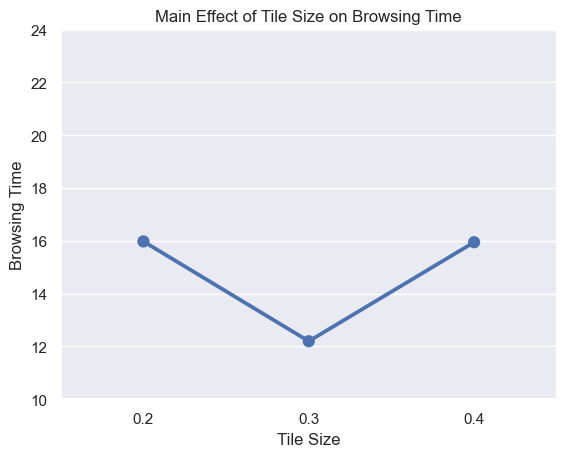

In [269]:
sns.set_theme(style="darkgrid")
fig1 = sns.pointplot(x="TS",  y="Y", data=data, ci=None)
fig1.set_ylabel("Browsing Time")
fig1.set_xlabel("Tile Size")
fig1.set_title("Main Effect of Tile Size on Browsing Time")
fig1.set_ylim(10,24)

plt.savefig("main_TS_3.png")
plt.show()

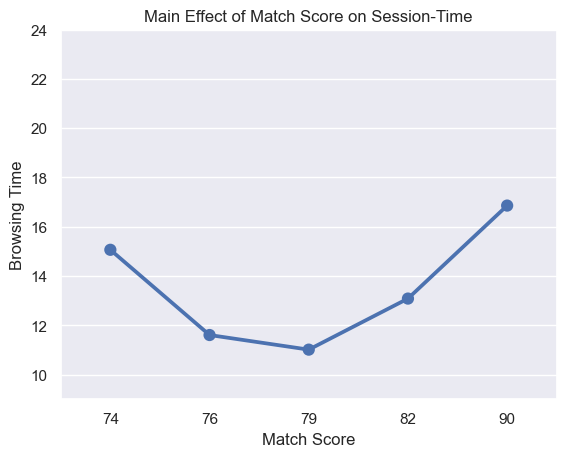

In [270]:
sns.set_theme(style="darkgrid")
fig1 = sns.pointplot(x="MS",  y="Y", data=data, ci=None)
fig1.set_ylabel("Browsing Time")
fig1.set_xlabel("Match Score")
fig1.set_title("Main Effect of Match Score on Session-Time")
fig1.set_ylim(9,24)
plt.savefig("main_MS_3.png")
plt.show()

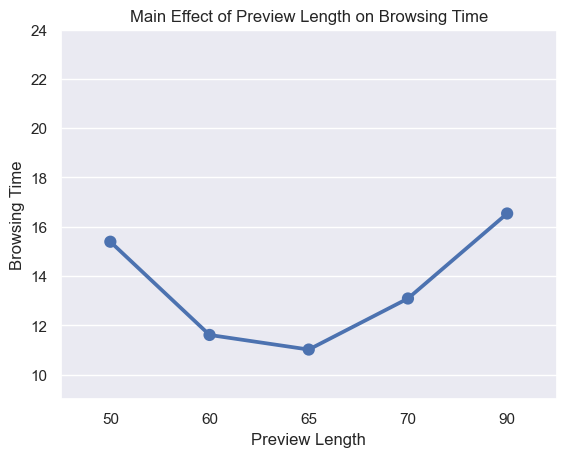

In [271]:
sns.set_theme(style="darkgrid")
fig1 = sns.pointplot(x="PL",  y="Y", data=data, ci=None)
fig1.set_ylabel("Browsing Time")
fig1.set_xlabel("Preview Length")
fig1.set_title("Main Effect of Preview Length on Browsing Time")
fig1.set_ylim(9,24)
plt.savefig("main_PL_3.png")
plt.show()

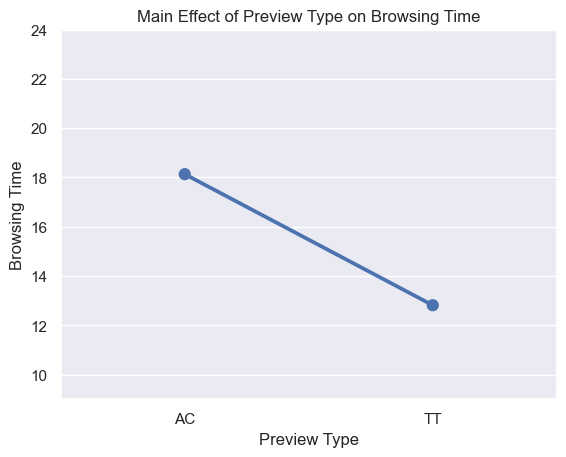

In [272]:
sns.set_theme(style="darkgrid")
fig1 = sns.pointplot(x="PT",  y="Y", data=data, ci=None)
fig1.set_ylabel("Browsing Time")
fig1.set_xlabel("Preview Type")
fig1.set_title("Main Effect of Preview Type on Browsing Time")
fig1.set_ylim(9,24)
plt.savefig("main_PT_3.png")
plt.show()

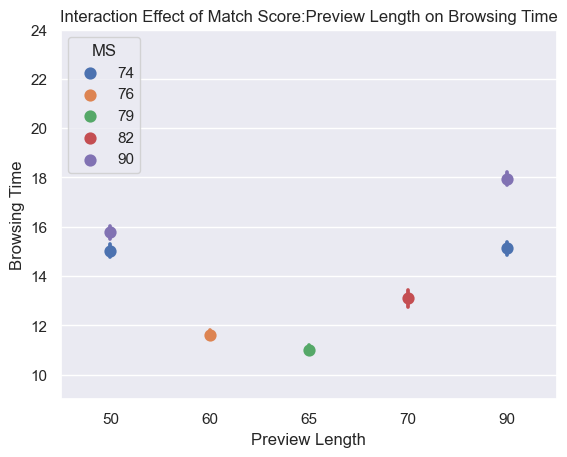

In [273]:
sns.set_theme(style="darkgrid")
fig1 = sns.pointplot(x="PL", hue='MS',  y="Y", data=data)
fig1.set_ylabel("Browsing Time")
fig1.set_xlabel("Preview Length")
fig1.set_title("Interaction Effect of Match Score:Preview Length on Browsing Time")
fig1.set_ylim(9,24)
plt.savefig("interaction_MS_PL_3.png")
plt.show()

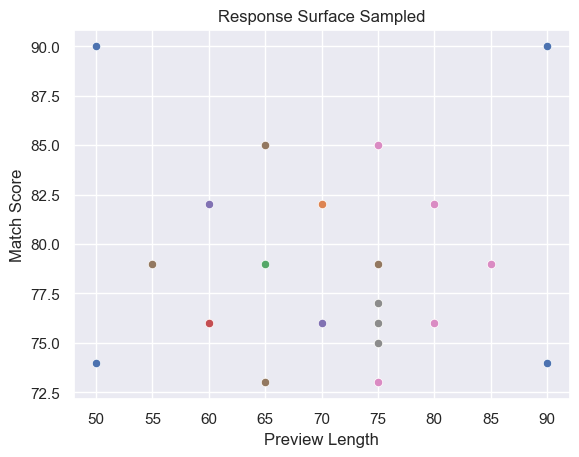

In [331]:
sns.set_theme(style="darkgrid")
fig1 = sns.scatterplot(x="PL",  y="MS", data=data,ci=None)
fig1 = sns.scatterplot(x="PL",  y="MS", data=centroid,ci=None)
fig1 = sns.scatterplot(x="PL",  y="MS", data=new_point_1,ci=None)

fig1 = sns.scatterplot(x="PL",  y="MS", data=new_point_2,ci=None)

fig1 = sns.scatterplot(x="PL",  y="MS", data=new_point_34,ci=None)
fig1 = sns.scatterplot(x="PL",  y="MS", data=new_point_ccd2,ci=None)

fig1 = sns.scatterplot(x="PL",  y="MS", data=new_point_ccd3,ci=None)

fig1 = sns.scatterplot(x="PL",  y="MS", data=new_point_final,ci=None)


# fig1 = sns.scatterplot(x=[70,70],y=[70,88])
#
# fig1 = sns.scatterplot(x=[75,75,75],y=[75,77,76])
# fig2 = sns.scatterplot(x=[65,65,55,75], y=[73,85,79,79])
# fig3 = sns.scatterplot(x=[75,80,85], y=[85,82,79])
# fig4 = sns.scatterplot(x=[75,80], y=[73,76])
# fig5 = sns.scatterplot(x =[70,75,80], y=[80,80,80])
# fig1.set_ylabel("Scroll Time")
fig1.set_xlabel("Preview Length")
fig1.set_ylabel("Match Score")

fig1.set_title("Response Surface Sampled")
# fig1.set_ylim(70,90)
# plt.show()
plt.savefig("conditions_step5.png")
plt.show()

In [246]:
!PWD

/Users/gurug/USF/MSDS 629 Experiments in DS/Code:HW/PROJ/FINAL


In [222]:
import pandas as pd
import glob
import os

path = r'/Users/gurug/USF/MSDS 629 Experiments in DS/Code:HW/PROJ/FINAL' # use your path
all_files = glob.glob(os.path.join(path , "*TMSJGGAS.csv"))

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
